# San Joaquin Valley Township Soils
Related links:
* For the documentation about these datasets, their source, how to download them, and the features of interest, please refer to our [Soils Datasets](../doc/assets/soilss.md) documentation
* For the explanations on how the crom mapping datasets are overlaid with township boundaries to obtain the amount of land used for each crop type in each township, please refer to our [Overlaying San Joaquin Valley Township Boundaries](../doc/etl/township_overlay.md) documentation

In [1]:
import matplotlib.pyplot as plt
from lib.soils import SoilsDataset

Load the data by instantiating the SoilDataset class based on the shapefile map data, the soil CSV dataset and the GeoJSON map data of the San Joaquin Valley

In [2]:
soil_dataset = SoilsDataset()

Pre-process the soil maps and data according to their specificities

In [3]:
soil_dataset.preprocess_map_df()
soil_dataset.preprocess_data_df()

Merge the soil maps and data into the map dataset.
This dataset contains only data for from the 2016 soil survey dataset. As we do not expect the soils nature to change from year to year, the 2016 year data is used for all the years from 2015.

In [4]:
soil_dataset.merge_map_with_data(dropkeys=True)

Overlay the San Joaquin Valley boundaries on the soil dataset

In [5]:
soil_dataset.overlay_township_boundries()

The result is the following GeoPandas GeoDataFrame containing:
* the Polygon representing the area inside a Township
* the Township code in which this land area is
* the original map unit key this land belong to
* the dominant soil type of this land area

In [6]:
soil_dataset.map_df

,YEAR,DOMINANT_SOIL_TYPE,TOWNSHIP_RANGE,geometry
0,2016.0,Entisols_C,T27S R19E,"POLYGON ((-119.91307 35.52752, -119.91996 35.5..."
1,2016.0,Aridisols_B,T27S R19E,"POLYGON ((-119.94502 35.52651, -119.95359 35.5..."
2,2016.0,Entisols_D,T27S R19E,"POLYGON ((-119.97883 35.56339, -119.97673 35.5..."
3,2016.0,Entisols_C,T27S R19E,"POLYGON ((-119.93861 35.56355, -119.94138 35.5..."
4,2016.0,Aridisols_C,T27S R19E,"POLYGON ((-119.97560 35.61207, -119.96748 35.6..."
...,...,...,...,...
2134,2016.0,Histosols_C,T04N R04E,"POLYGON ((-121.55883 38.19077, -121.55225 38.1..."
2135,2016.0,Mollisols_C,T04N R04E,"POLYGON ((-121.48059 38.18565, -121.48178 38.1..."
2136,2016.0,Mollisols_C,T05N R04E,"POLYGON ((-121.50368 38.24752, -121.48471 38.2..."
2137,2016.0,Aridisols_C,NaN,"POLYGON ((-120.07591 35.87740, -120.07566 35.8..."


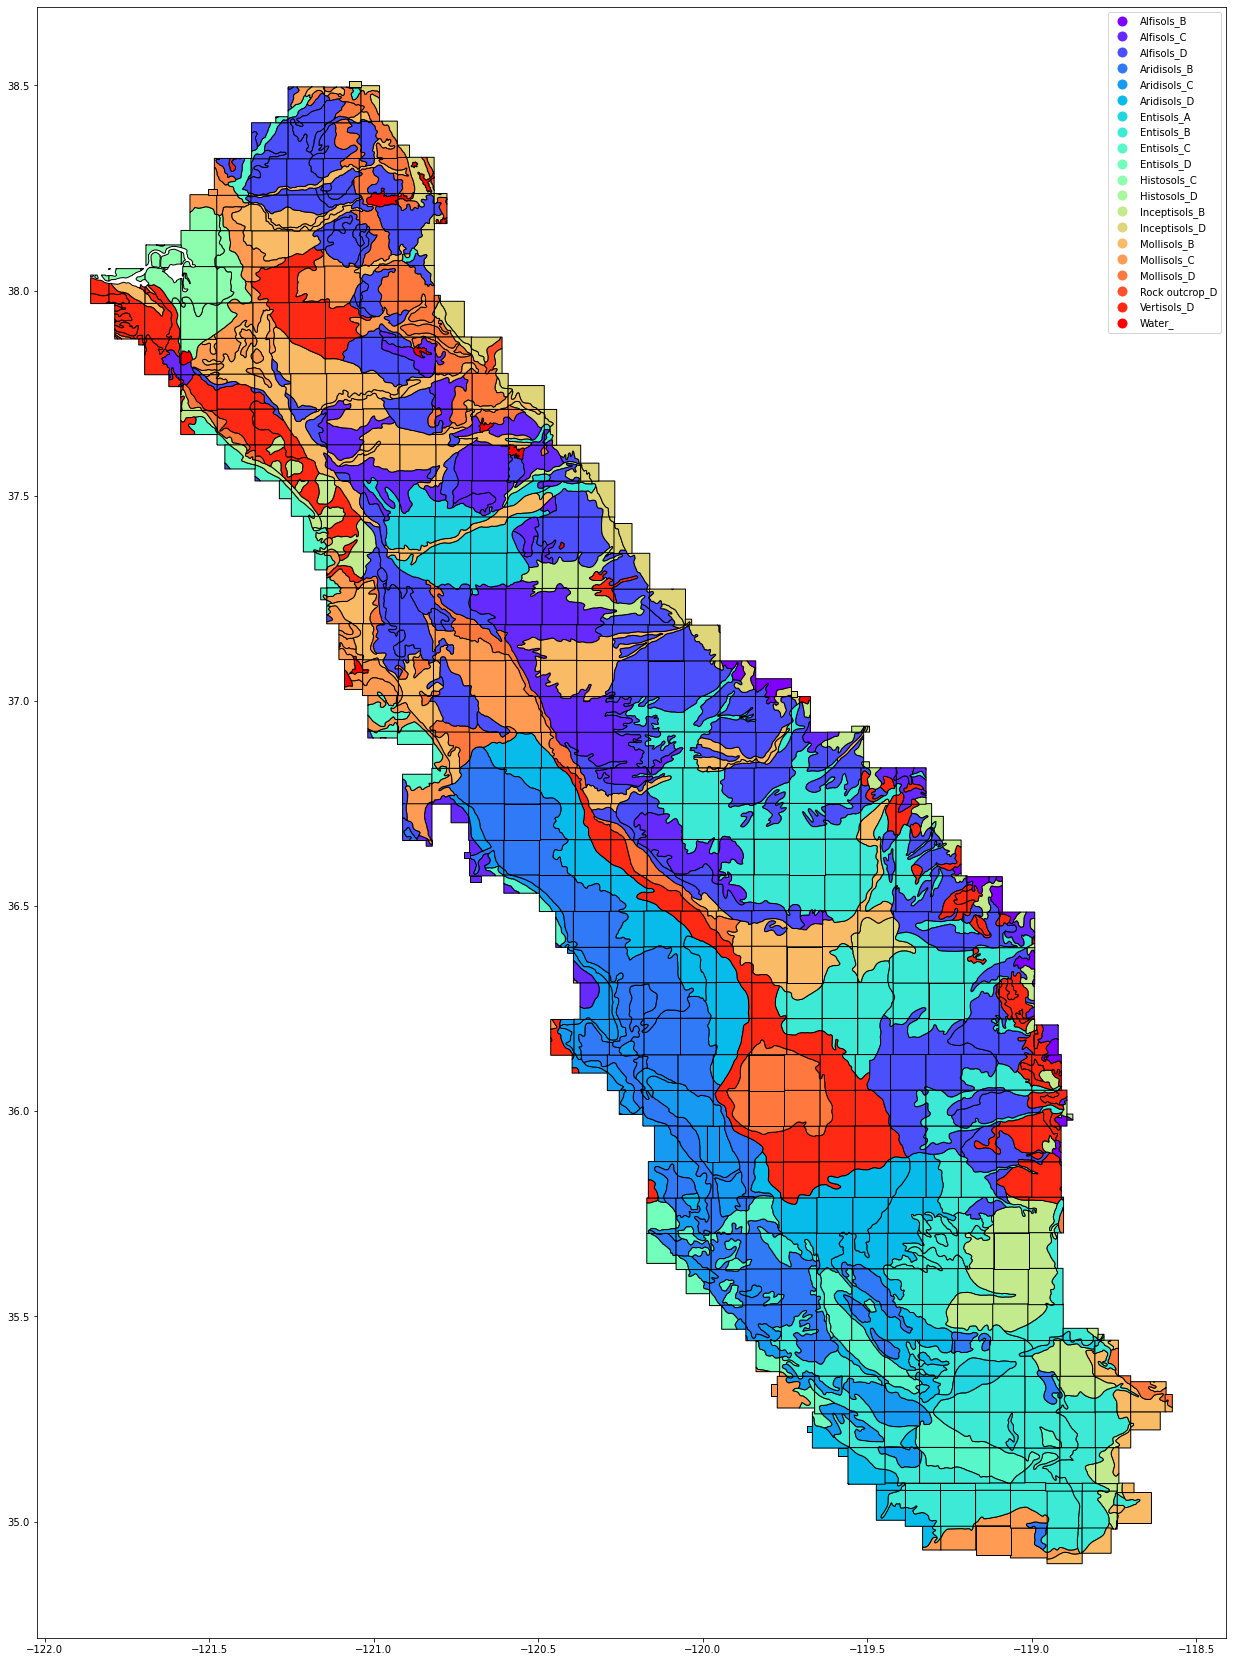

In [7]:
fig, ax = plt.subplots(figsize=(30,30))
soil_dataset.map_df.plot(ax=ax, column="DOMINANT_SOIL_TYPE", edgecolor='black', linewidth = 1, cmap="rainbow", legend=True)
plt.show()

The soil survey dataset only contains data from the 2016 soil survey. As we do not expect the soil type to change from year, the 2016 soil data are used for all the other years.

We also pivot the table to generate the features and drop features which do not appear more than 5% in every township in any year.

In [8]:
soil_dataset.fill_missing_years()
soil_dataset.pivot_township_categorical_feature_for_output(feature_name="DOMINANT_SOIL_TYPE", feature_prefix="SOIL")
soil_dataset.drop_features(drop_rate=0.05)

D:\code\jupyter_nb_data\UMSI\milestone2_waterwells_deepnote\lib\wsdatasets.py:233: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  self.map_df["AREA"] = self.map_df.geometry.area


In [9]:
soil_dataset.output_df

,TOWNSHIP_RANGE,YEAR,SOIL_ALFISOLS_B,SOIL_ALFISOLS_C,SOIL_ALFISOLS_D,SOIL_ARIDISOLS_B,SOIL_ARIDISOLS_C,SOIL_ARIDISOLS_D,SOIL_ENTISOLS_A,SOIL_ENTISOLS_B,...,SOIL_ENTISOLS_D,SOIL_HISTOSOLS_C,SOIL_INCEPTISOLS_B,SOIL_INCEPTISOLS_D,SOIL_MOLLISOLS_B,SOIL_MOLLISOLS_C,SOIL_MOLLISOLS_D,SOIL_ROCK_OUTCROP_D,SOIL_VERTISOLS_D,SOIL_WATER_
0,T01N R02E,2014.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.002243,0.04471,0.0,0.0,0.953047,0.0
1,T01N R02E,2015.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.002243,0.04471,0.0,0.0,0.953047,0.0
2,T01N R02E,2016.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.002243,0.04471,0.0,0.0,0.953047,0.0
3,T01N R02E,2017.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.002243,0.04471,0.0,0.0,0.953047,0.0
4,T01N R02E,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.002243,0.04471,0.0,0.0,0.953047,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3819,T32S R30E,2017.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.116073,...,0.0,0.0,0.692143,0.0,0.191784,0.00000,0.0,0.0,0.000000,0.0
3820,T32S R30E,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.116073,...,0.0,0.0,0.692143,0.0,0.191784,0.00000,0.0,0.0,0.000000,0.0
3821,T32S R30E,2019.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.116073,...,0.0,0.0,0.692143,0.0,0.191784,0.00000,0.0,0.0,0.000000,0.0
3822,T32S R30E,2020.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.116073,...,0.0,0.0,0.692143,0.0,0.191784,0.00000,0.0,0.0,0.000000,0.0


In [11]:
soil_dataset.output_dataset_to_csv("../assets/outputs/soils.csv")